Etude de la matrice de rotation du skate:
https://thepoorengineer.com/en/quaternion/

In [9]:
import os
import sys

print(sys.path)
if "/home/pierre/SkateboardXXX3000/01_Python/MovuinoDataHandler/" not in sys.path:
    sys.path.append('/home/pierre/SkateboardXXX3000/01_Python/MovuinoDataHandler/')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

import movuinos.SkateboardXXX3000DataSet as sk
import tools.display_functions as df
import tools.signal_analysis as sa
import tools.correction_interpolation as ci

import models.detection.detection_energy as dt
import models.classification.reference_tricks_classification as rtc

from pathlib import Path

from tools.quaternion import Quaternion#, get_euler_angles, get_rot_mat

['/home/pierre/SkateboardXXX3000/01_Python/MovuinoDataHandler/study', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/pierre/SkateboardXXX3000/01_Python/MovuinoDataHandler/venv/lib/python3.8/site-packages', '/home/pierre/.local/lib/python3.8/site-packages', '/home/pierre/SkateboardXXX3000/01_Python/MovuinoDataHandler/']


In [10]:
tricks_path = "../../../06_Data/Isolated_Tricks/ollie/ollie_success_9.csv"

print(Path(tricks_path).exists())
#--- Opening file ---
print("Opening : " + tricks_path)
trick = sk.SkateboardXXX3000DataSet(tricks_path)

True
Opening : ../../../06_Data/Isolated_Tricks/ollie/ollie_success_9.csv
Reading : ../../../06_Data/Isolated_Tricks/ollie/ollie_success_9.csv


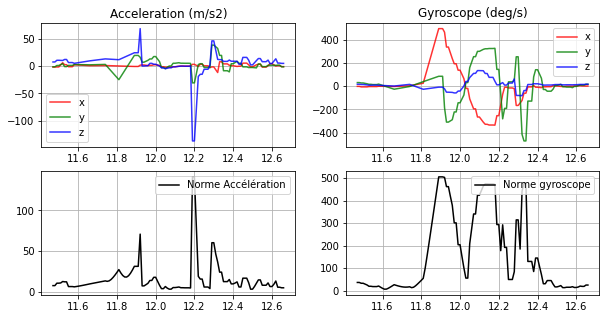

In [11]:
plt.figure(figsize=(10,5))
trick.dispRawData()

In [12]:
quaternion=Quaternion()
print(trick.gyroscope[:,100])
for i in range(trick.nb_row):
    quaternion.rotate(trick.gyroscope[:,i]*np.pi/180,trick.Te)

print(quaternion.q)
print(quaternion.get_rot_mat())

[ -4.01070457 -42.97183463  10.31324031]
[1.00526884 0.04483286 0.05699189 0.18564291]
[[ 0.97486406 -0.36813184  0.13123015]
 [ 0.37835228  0.97734024 -0.06897788]
 [-0.09793854  0.11129844  1.03977067]]
